In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time
pd.set_option("display.max_columns", None)

In [2]:
path = "/Users/niharawarawita/Desktop/MSc Project/Data and code/complete_dataset_15subwindows_3slices.csv"
data = pd.read_csv(path)
data.head(10)

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,max_Ax_hand0,max_Ay_hand0,max_Az_hand0,max_Vx_hand0,max_Vy_hand0,max_Vz_hand0,max_Jx_hand0,max_Jy_hand0,max_Jz_hand0,mean_Ax_hand0,mean_Ay_hand0,mean_Az_hand0,mean_Vx_hand0,mean_Vy_hand0,mean_Vz_hand0,mean_Jx_hand0,mean_Jy_hand0,mean_Jz_hand0,std_Ax_hand0,std_Ay_hand0,std_Az_hand0,std_Vx_hand0,std_Vy_hand0,std_Vz_hand0,std_Jx_hand0,std_Jy_hand0,std_Jz_hand0,max_Ax_hand1,max_Ay_hand1,max_Az_hand1,max_Vx_hand1,max_Vy_hand1,max_Vz_hand1,max_Jx_hand1,max_Jy_hand1,max_Jz_hand1,mean_Ax_hand1,mean_Ay_hand1,mean_Az_hand1,mean_Vx_hand1,mean_Vy_hand1,mean_Vz_hand1,mean_Jx_hand1,mean_Jy_hand1,mean_Jz_hand1,std_Ax_hand1,std_Ay_hand1,std_Az_hand1,std_Vx_hand1,std_Vy_hand1,std_Vz_hand1,std_Jx_hand1,std_Jy_hand1,std_Jz_hand1,max_w_hand0,max_x_hand0,max_y_hand0,max_z_hand0,max_AVx_hand0,max_AVy_hand0,max_AVz_hand0,max_AAx_hand0,max_AAy_hand0,max_AAz_hand0,max_AJx_hand0,max_AJy_hand0,max_AJz_hand0,mean_w_hand0,mean_x_hand0,mean_y_hand0,mean_z_hand0,mean_AVx_hand0,mean_AVy_hand0,mean_AVz_hand0,mean_AAx_hand0,mean_AAy_hand0,mean_AAz_hand0,mean_AJx_hand0,mean_AJy_hand0,mean_AJz_hand0,std_w_hand0,std_x_hand0,std_y_hand0,std_z_hand0,std_AVx_hand0,std_AVy_hand0,std_AVz_hand0,std_AAx_hand0,std_AAy_hand0,std_AAz_hand0,std_AJx_hand0,std_AJy_hand0,std_AJz_hand0,max_w_hand1,max_x_hand1,max_y_hand1,max_z_hand1,max_AVx_hand1,max_AVy_hand1,max_AVz_hand1,max_AAx_hand1,max_AAy_hand1,max_AAz_hand1,max_AJx_hand1,max_AJy_hand1,max_AJz_hand1,mean_w_hand1,mean_x_hand1,mean_y_hand1,mean_z_hand1,mean_AVx_hand1,mean_AVy_hand1,mean_AVz_hand1,mean_AAx_hand1,mean_AAy_hand1,mean_AAz_hand1,mean_AJx_hand1,mean_AJy_hand1,mean_AJz_hand1,std_w_hand1,std_x_hand1,std_y_hand1,std_z_hand1,std_AVx_hand1,std_AVy_hand1,std_AVz_hand1,std_AAx_hand1,std_AAy_hand1,std_AAz_hand1,std_AJx_hand1,std_AJy_hand1,std_AJz_hand1
0,7,14,0,smoothness,1,3,medium,2,1,1,0.500000,0.620513,0.675978,0.495868,0.759036,0.652406,0.76250,0.666667,0.497558,0.612908,0.665979,0.492323,0.718373,0.636455,0.748970,0.661048,0.002307,0.002685,0.003138,0.002326,0.007215,0.004555,0.003543,0.002655,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.648515,0.576037,0.497131,0.848195,0.691944,0.635252,0.491607,0.526964,0.597308,0.558093,0.003403,0.011867,0.012139,0.020191,0.002323,0.156897,0.015387,0.005509,-0.852173,-0.068771,0.481033,0.000330,0.000281,0.000349,0.906808,0.944010,1.878005,-0.863647,-0.092331,0.468185,-0.000014,0.000033,-0.000021,0.018182,0.033422,0.090670,0.006859,0.010176,0.008799,0.000187,0.000229,0.000238,0.488839,0.644995,0.731794,0.992020,0.013489,-0.198410,0.001218,0.000510,0.001187,1.448006,1.255580,2.343750,0.970749,-0.013306,-0.239548,3.039551e-05,-0.000022,0.000121,0.039065,-0.063439,0.154164,0.016338,0.011627,0.024494,0.000461,0.000354,0.000641,0.865981,0.887638,1.211894,0.179352,0.486364,0.160615,-0.840857,0.133141,0.061469,0.117029,4.332320,2.887801,19.812834,554.574503,268.044509,1338.775861,0.176140,0.485378,0.158694,-0.841542,-0.003855,-0.006977,-0.063971,-0.440979,0.013134,-0.200017,-49.406882,-39.838054,68.564941,0.002032,0.000740,0.001425,0.000338,0.053708,0.033528,0.137260,2.915747,1.852018,9.040299,366.140398,183.977327,777.818352,0.613327,-0.175326,-0.758505,-0.128901,0.14007

In [3]:
print(data.property_name.unique())
print(data.property_id.unique())
print(sorted(data.clothes_id.unique()))

['smoothness' 'thickness' 'warmth' 'flexibility' 'softness' 'enjoyment']
[0 1 2 3 4 5]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36]


In [4]:
# Initialise the random state
num = 183 #
#num = random.randint(1, 500)
print(f"The generated random seed is {num}") #347

The generated random seed is 183


## Section A) Physical properties

### Observe the data

In [5]:
physical_data = data[data.property_name != 'enjoyment']
physical_data.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,max_Ax_hand0,max_Ay_hand0,max_Az_hand0,max_Vx_hand0,max_Vy_hand0,max_Vz_hand0,max_Jx_hand0,max_Jy_hand0,max_Jz_hand0,mean_Ax_hand0,mean_Ay_hand0,mean_Az_hand0,mean_Vx_hand0,mean_Vy_hand0,mean_Vz_hand0,mean_Jx_hand0,mean_Jy_hand0,mean_Jz_hand0,std_Ax_hand0,std_Ay_hand0,std_Az_hand0,std_Vx_hand0,std_Vy_hand0,std_Vz_hand0,std_Jx_hand0,std_Jy_hand0,std_Jz_hand0,max_Ax_hand1,max_Ay_hand1,max_Az_hand1,max_Vx_hand1,max_Vy_hand1,max_Vz_hand1,max_Jx_hand1,max_Jy_hand1,max_Jz_hand1,mean_Ax_hand1,mean_Ay_hand1,mean_Az_hand1,mean_Vx_hand1,mean_Vy_hand1,mean_Vz_hand1,mean_Jx_hand1,mean_Jy_hand1,mean_Jz_hand1,std_Ax_hand1,std_Ay_hand1,std_Az_hand1,std_Vx_hand1,std_Vy_hand1,std_Vz_hand1,std_Jx_hand1,std_Jy_hand1,std_Jz_hand1,max_w_hand0,max_x_hand0,max_y_hand0,max_z_hand0,max_AVx_hand0,max_AVy_hand0,max_AVz_hand0,max_AAx_hand0,max_AAy_hand0,max_AAz_hand0,max_AJx_hand0,max_AJy_hand0,max_AJz_hand0,mean_w_hand0,mean_x_hand0,mean_y_hand0,mean_z_hand0,mean_AVx_hand0,mean_AVy_hand0,mean_AVz_hand0,mean_AAx_hand0,mean_AAy_hand0,mean_AAz_hand0,mean_AJx_hand0,mean_AJy_hand0,mean_AJz_hand0,std_w_hand0,std_x_hand0,std_y_hand0,std_z_hand0,std_AVx_hand0,std_AVy_hand0,std_AVz_hand0,std_AAx_hand0,std_AAy_hand0,std_AAz_hand0,std_AJx_hand0,std_AJy_hand0,std_AJz_hand0,max_w_hand1,max_x_hand1,max_y_hand1,max_z_hand1,max_AVx_hand1,max_AVy_hand1,max_AVz_hand1,max_AAx_hand1,max_AAy_hand1,max_AAz_hand1,max_AJx_hand1,max_AJy_hand1,max_AJz_hand1,mean_w_hand1,mean_x_hand1,mean_y_hand1,mean_z_hand1,mean_AVx_hand1,mean_AVy_hand1,mean_AVz_hand1,mean_AAx_hand1,mean_AAy_hand1,mean_AAz_hand1,mean_AJx_hand1,mean_AJy_hand1,mean_AJz_hand1,std_w_hand1,std_x_hand1,std_y_hand1,std_z_hand1,std_AVx_hand1,std_AVy_hand1,std_AVz_hand1,std_AAx_hand1,std_AAy_hand1,std_AAz_hand1,std_AJx_hand1,std_AJy_hand1,std_AJz_hand1
0,7,14,0,smoothness,1,3,medium,2,1,1,0.500000,0.620513,0.675978,0.495868,0.759036,0.652406,0.76250,0.666667,0.497558,0.612908,0.665979,0.492323,0.718373,0.636455,0.748970,0.661048,0.002307,0.002685,0.003138,0.002326,0.007215,0.004555,0.003543,0.002655,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.648515,0.576037,0.497131,0.848195,0.691944,0.635252,0.491607,0.526964,0.597308,0.558093,0.003403,0.011867,0.012139,0.020191,0.002323,0.156897,0.015387,0.005509,-0.852173,-0.068771,0.481033,0.000330,0.000281,0.000349,0.906808,0.944010,1.878005,-0.863647,-0.092331,0.468185,-0.000014,0.000033,-0.000021,0.018182,0.033422,0.090670,0.006859,0.010176,0.008799,0.000187,0.000229,0.000238,0.488839,0.644995,0.731794,0.992020,0.013489,-0.198410,0.001218,0.000510,0.001187,1.448006,1.255580,2.343750,0.970749,-0.013306,-0.239548,0.000030,-0.000022,0.000121,0.039065,-0.063439,0.154164,0.016338,0.011627,0.024494,0.000461,0.000354,0.000641,0.865981,0.887638,1.211894,0.179352,0.486364,0.160615,-0.840857,0.133141,0.061469,0.117029,4.332320,2.887801,19.812834,554.574503,268.044509,1338.775861,0.176140,0.485378,0.158694,-0.841542,-0.003855,-0.006977,-0.063971,-0.440979,0.013134,-0.200017,-49.406882,-39.838054,68.564941,0.002032,0.000740,0.001425,0.000338,0.053708,0.033528,0.137260,2.915747,1.852018,9.040299,366.140398,183.977327,777.818352,0.613327,-0.175326,-0.758505,-0.128901,0.140072,0.

In [6]:
emg_data = physical_data.iloc[:,:58]
emg_data.head()

,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1
0,7,14,0,smoothness,1,3,medium,2,1,1,0.500000,0.620513,0.675978,0.495868,0.759036,0.652406,0.76250,0.666667,0.497558,0.612908,0.665979,0.492323,0.718373,0.636455,0.748970,0.661048,0.002307,0.002685,0.003138,0.002326,0.007215,0.004555,0.003543,0.002655,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.648515,0.576037,0.497131,0.848195,0.691944,0.635252,0.491607,0.526964,0.597308,0.558093,0.003403,0.011867,0.012139,0.020191,0.002323,0.156897,0.015387,0.005509
1,7,14,0,smoothness,1,3,medium,2,1,2,0.504132,0.615385,0.675978,0.495868,0.746988,0.652406,0.76250,0.666667,0.497598,0.612596,0.665782,0.492407,0.718562,0.637166,0.748672,0.660660,0.002384,0.002809,0.003041,0.002118,0.005858,0.004164,0.004050,0.002641,0.504098,0.880282,0.739884,0.677249,0.493878,0.787755,0.638614,0.576037,0.496903,0.848111,0.691901,0.634861,0.491535,0.511201,0.596760,0.557892,0.002710,0.007046,0.009382,0.011783,0.002204,0.112410,0.012228,0.005028
2,7,14,0,smoothness,1,3,medium,2,1,3,0.500000,0.620513,0.670391,0.500000,0.740964,0.652406,0.75625,0.666667,0.497347,0.612820,0.665915,0.492135,0.718647,0.637123,0.748899,0.660448,0.002305,0.002796,0.002866,0.002150,0.005362,0.004111,0.003325,0.002466,0.508197,0.908451,0.757225,0.714286,0.497959,0.714286,0.663366,0.580645,0.497276,0.849152,0.692361,0.634500,0.491582,0.497936,0.596169,0.558075,0.003055,0.010252,0.012065,0.015567,0.002336,0.102318,0.015758,0.004804
3,7,14,0,smoothness,1,3,medium,2,2,1,0.500000,0.620513,0.675978,0.495868,0.759036,0.663102,0.75625,0.666667,0.497443,0.612821,0.666131,0.492175,0.718675,0.637099,0.748906,0.660243,0.002216,0.002933,0.002905,0.001944,0.006295,0.004133,0.002764,0.002610,0.508197,0.929578,0.809249,0.661376,0.493878,0.820408,0.623762,0.571429,0.496850,0.848415,0.691944,0.633830,0.491046,0.475204,0.595730,0.557921,0.002842,0.009768,0.012697,0.006141,0.002243,0.129979,0.007751,0.004568
4,7,14,0,smoothness,1,3,medium,2,2,2,0.504132,0.620513,0.675978,0.500000,0.746988,0.652406,0.75625,0.666667,0.497288,0.612981,0.666096,0.492485,0.718599,0.637199,0.748633,0.660694,0.002410,0.002631,0.002747,0.002533,0.007066,0.004893,0.003338,0.002610,0.508197,0.957746,0.809249,0.746032,0.497959,0.995918,0.683168,0.576037,0.497019,0.849392,0.694069,0.635642,0.491512,0.481447,0.598588,0.558258,0.004213,0.017909,0.026751,0.023597,0.002201,0.248909,0.021109,0.005739


In [7]:
print(physical_data.shape)
print(emg_data.shape)

(18899, 190)
(18899, 58)


<AxesSubplot:>

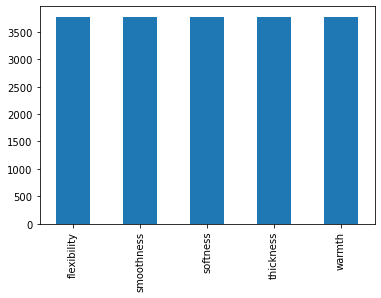

In [8]:
physical_data['property_name'].value_counts().sort_index().plot.bar()

Balanced data. Each property has approximately the same number of samples

<AxesSubplot:>

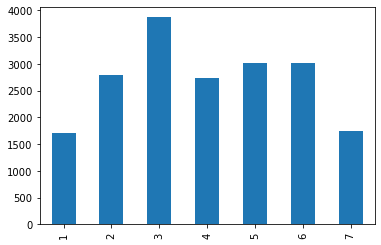

In [9]:
physical_data['rating'].value_counts().sort_index().plot.bar()

Modal answer was 6. Very few people said 1

<AxesSubplot:>

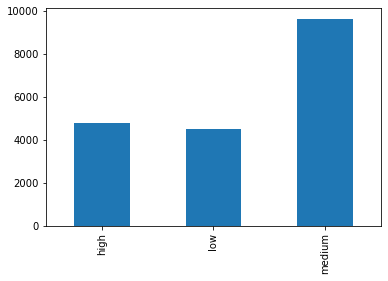

In [10]:
physical_data['rating_level'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

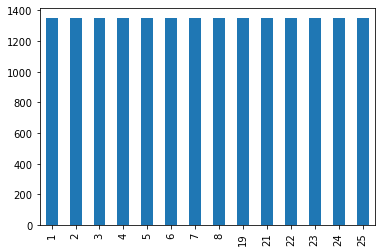

In [11]:
physical_data['participant_id'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

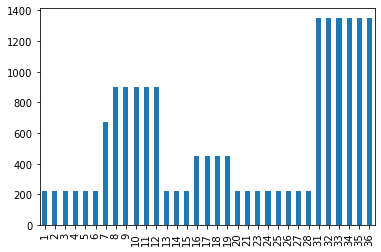

In [12]:
physical_data['clothes_id'].value_counts().sort_index().plot.bar()

Unbalanced data. More than double the number of observations for medium than low

### Task 1: Predicting the property based on the provided data (excluding enjoyment data)

#### Step 1: LOPOCV (Leave One Participant Out CV)

In [13]:
# Note: predicting_feature = 'property_id' or 'rating'

def rf_LOPOCV(data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num, starting_index=10):
    if predicting_feature == 'property_id':
        print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')
    else:
        print(f'Classification accuracy when predicting ratings at random : {round(1/len(data.rating_level_num.unique())*100,2)}% ')
    print('__________________________________________')

    if predicting_feature == 'property_id':
        macro_f1_lst = []
    elif predicting_feature == 'rating_level_num':
        weighted_f1_lst = []    
    micro_f1_lst = []
    acc_lst = []
    total_conf_mat = 0

    for participant in sorted(data.participant_id.unique()): #range(19,26):    

        # Split the data into training and testing
        training_data = data[data.participant_id != participant]
        testing_data = data[data.participant_id == participant]

        # Data preparation
        #starting_index = 11
        X_train = training_data.iloc[:,starting_index:].values        
        y_train = training_data[predicting_feature].values
        X_test = testing_data.iloc[:,starting_index:].values        
        y_test = testing_data[predicting_feature].values
        
       
        # Configure the cross-validation procedure
        cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)

        # Define the model
        rf_model = RandomForestClassifier(random_state=num)

        # Create a dictionary with the hyperparameters to tune
        features_dict = dict()
        features_dict['n_estimators'] = [100, 500, 1000, 1500]

        # Define the Grid Search
        if predicting_feature == 'property_id':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_macro', cv=cv_inner, refit=True) #accuracy
        elif predicting_feature == 'rating_level_num':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_weighted', cv=cv_inner, refit=True) #accuracy

        # Execute the search
        result = search.fit(X_train, y_train)

        # Obtain the best performing model fit on the whole training set
        best_rf_model = result.best_estimator_

        # Using the model, obtain predictions for the test data
        predictions = best_rf_model.predict(X_test)

        # Evaluate the model
        if predicting_feature == 'property_id':
            conf_mat = confusion_matrix(y_test, predictions, labels=[0, 1, 2, 3, 4])
            macro_f1_score = f1_score(y_test, predictions, average='macro') 
            macro_f1_lst.append(macro_f1_score) 
        elif predicting_feature == 'rating_level_num':
            conf_mat = confusion_matrix(y_test, predictions, labels=[1,2,3])
            weighted_f1_score = f1_score(y_test, predictions, average='weighted') 
            weighted_f1_lst.append(weighted_f1_score)
            
        total_conf_mat += conf_mat
        micro_f1_score = f1_score(y_test, predictions, average='micro')  
        micro_f1_lst.append(micro_f1_score)
        acc = accuracy_score(y_test, predictions)
        acc_lst.append(acc)

        print(f'Leaving participant {participant} out {result.best_params_}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) Micro F1 score = {round(micro_f1_score,2)}")
        if predicting_feature == 'property_id':
            print(f"(3) Macro F1 score = {round(macro_f1_score,2)}")
        elif predicting_feature == 'rating_level_num':
            print(f"(3) Weighted F1 score = {round(weighted_f1_score,2)}")            
        print(f"(4) Percentage Classification accuracy = {round(acc*100,2)}%")

        print('__________________________________________')

    avg_micro_f1_score = sum(micro_f1_lst) / len(micro_f1_lst)
    if predicting_feature == 'property_id':
        avg_macro_f1_score = sum(macro_f1_lst) / len(macro_f1_lst)
    elif predicting_feature == 'rating_level_num':
        avg_weighted_f1_score = sum(weighted_f1_lst) / len(weighted_f1_lst)               
    avg_acc = sum(acc_lst) / len(acc_lst)   
    
    print(f'Using Leave One Participant Out CV (LOPOCV):') 
    print("(1) Confusion matrix:\n", total_conf_mat)
    print(f"(2) Average micro F1 score = {round(avg_micro_f1_score,2)}")
    if predicting_feature == 'property_id':
        print(f"(3) Average macro F1 score = {round(avg_macro_f1_score,2)}")
    elif predicting_feature == 'rating_level_num':
        print(f"(3) Average weighted F1 score = {round(avg_weighted_f1_score,2)}")      
    print(f"(4) Average Percentage Classification accuracy = {round(avg_acc*100,2)}%")
          

##### Using all features (180 features)

In [14]:
#t1 = time.time()
#rf_LOPOCV_properties(data=physical_data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num) 
#t2 = time.time()

In [15]:
#t2-t1

##### Using only emg features (48 features)

In [16]:
#t3 = time.time()
#rf_LOPOCV_properties(data=emg_data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num) 
#t4 = time.time()

In [17]:
#t4-t3

rf_LOCOCV_properties(data=physical_data, num_inner_folds=3, predicting_feature = 'property_id', random_state=num) 


### Task 2: Predicting the rating of the property based on the data

#### Step 1: LOPOCV (Leave One Participant Out CV)

In [18]:
def one_hot_encode_properties(df, predicting_feature = 'property_id'):
    # Create an instance of a one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    # Perform one-hot encoding on the specified column 
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[predicting_feature]]).toarray())
    
    return encoder_df


In [19]:
# One hot encode properties and add this to physical data
properties_one_hot_encoded = one_hot_encode_properties(df=physical_data, predicting_feature = 'property_id')
print(properties_one_hot_encoded.shape, physical_data.shape)
new_physical_data = pd.concat([physical_data.reset_index(drop=True), properties_one_hot_encoded.reset_index(drop=True)], axis = 1)
print(new_physical_data.shape)
new_physical_data.head()

(18899, 5) (18899, 190)
(18899, 195)


,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,max_Ax_hand0,max_Ay_hand0,max_Az_hand0,max_Vx_hand0,max_Vy_hand0,max_Vz_hand0,max_Jx_hand0,max_Jy_hand0,max_Jz_hand0,mean_Ax_hand0,mean_Ay_hand0,mean_Az_hand0,mean_Vx_hand0,mean_Vy_hand0,mean_Vz_hand0,mean_Jx_hand0,mean_Jy_hand0,mean_Jz_hand0,std_Ax_hand0,std_Ay_hand0,std_Az_hand0,std_Vx_hand0,std_Vy_hand0,std_Vz_hand0,std_Jx_hand0,std_Jy_hand0,std_Jz_hand0,max_Ax_hand1,max_Ay_hand1,max_Az_hand1,max_Vx_hand1,max_Vy_hand1,max_Vz_hand1,max_Jx_hand1,max_Jy_hand1,max_Jz_hand1,mean_Ax_hand1,mean_Ay_hand1,mean_Az_hand1,mean_Vx_hand1,mean_Vy_hand1,mean_Vz_hand1,mean_Jx_hand1,mean_Jy_hand1,mean_Jz_hand1,std_Ax_hand1,std_Ay_hand1,std_Az_hand1,std_Vx_hand1,std_Vy_hand1,std_Vz_hand1,std_Jx_hand1,std_Jy_hand1,std_Jz_hand1,max_w_hand0,max_x_hand0,max_y_hand0,max_z_hand0,max_AVx_hand0,max_AVy_hand0,max_AVz_hand0,max_AAx_hand0,max_AAy_hand0,max_AAz_hand0,max_AJx_hand0,max_AJy_hand0,max_AJz_hand0,mean_w_hand0,mean_x_hand0,mean_y_hand0,mean_z_hand0,mean_AVx_hand0,mean_AVy_hand0,mean_AVz_hand0,mean_AAx_hand0,mean_AAy_hand0,mean_AAz_hand0,mean_AJx_hand0,mean_AJy_hand0,mean_AJz_hand0,std_w_hand0,std_x_hand0,std_y_hand0,std_z_hand0,std_AVx_hand0,std_AVy_hand0,std_AVz_hand0,std_AAx_hand0,std_AAy_hand0,std_AAz_hand0,std_AJx_hand0,std_AJy_hand0,std_AJz_hand0,max_w_hand1,max_x_hand1,max_y_hand1,max_z_hand1,max_AVx_hand1,max_AVy_hand1,max_AVz_hand1,max_AAx_hand1,max_AAy_hand1,max_AAz_hand1,max_AJx_hand1,max_AJy_hand1,max_AJz_hand1,mean_w_hand1,mean_x_hand1,mean_y_hand1,mean_z_hand1,mean_AVx_hand1,mean_AVy_hand1,mean_AVz_hand1,mean_AAx_hand1,mean_AAy_hand1,mean_AAz_hand1,mean_AJx_hand1,mean_AJy_hand1,mean_AJz_hand1,std_w_hand1,std_x_hand1,std_y_hand1,std_z_hand1,std_AVx_hand1,std_AVy_hand1,std_AVz_hand1,std_AAx_hand1,std_AAy_hand1,std_AAz_hand1,std_AJx_hand1,std_AJy_hand1,std_AJz_hand1,0,1,2,3,4
0,7,14,0,smoothness,1,3,medium,2,1,1,0.500000,0.620513,0.675978,0.495868,0.759036,0.652406,0.76250,0.666667,0.497558,0.612908,0.665979,0.492323,0.718373,0.636455,0.748970,0.661048,0.002307,0.002685,0.003138,0.002326,0.007215,0.004555,0.003543,0.002655,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.648515,0.576037,0.497131,0.848195,0.691944,0.635252,0.491607,0.526964,0.597308,0.558093,0.003403,0.011867,0.012139,0.020191,0.002323,0.156897,0.015387,0.005509,-0.852173,-0.068771,0.481033,0.000330,0.000281,0.000349,0.906808,0.944010,1.878005,-0.863647,-0.092331,0.468185,-0.000014,0.000033,-0.000021,0.018182,0.033422,0.090670,0.006859,0.010176,0.008799,0.000187,0.000229,0.000238,0.488839,0.644995,0.731794,0.992020,0.013489,-0.198410,0.001218,0.000510,0.001187,1.448006,1.255580,2.343750,0.970749,-0.013306,-0.239548,0.000030,-0.000022,0.000121,0.039065,-0.063439,0.154164,0.016338,0.011627,0.024494,0.000461,0.000354,0.000641,0.865981,0.887638,1.211894,0.179352,0.486364,0.160615,-0.840857,0.133141,0.061469,0.117029,4.332320,2.887801,19.812834,554.574503,268.044509,1338.775861,0.176140,0.485378,0.158694,-0.841542,-0.003855,-0.006977,-0.063971,-0.440979,0.013134,-0.200017,-49.406882,-39.838054,68.564941,0.002032,0.000740,0.001425,0.000338,0.053708,0.033528,0.137260,2.915747,1.852018,9.040299,366.140398,183.977327,777.818352,0.613327,-0.175326,-0.758505,-0.128901,0

In [20]:
# One hot encode properties and add this to emg data
emg_properties_one_hot_encoded = one_hot_encode_properties(df=emg_data, predicting_feature = 'property_id')
print(emg_properties_one_hot_encoded.shape, emg_data.shape)
new_emg_data = pd.concat([emg_data.reset_index(drop=True), emg_properties_one_hot_encoded.reset_index(drop=True)], axis = 1)
print(new_emg_data.shape)
new_emg_data.head()

(18899, 5) (18899, 58)
(18899, 63)


,participant_id,clothes_id,property_id,property_name,interaction_id,rating,rating_level,rating_level_num,sub_window_num,slice_num,max_ch1_hand0,max_ch2_hand0,max_ch3_hand0,max_ch4_hand0,max_ch5_hand0,max_ch6_hand0,max_ch7_hand0,max_ch8_hand0,mean_ch1_hand0,mean_ch2_hand0,mean_ch3_hand0,mean_ch4_hand0,mean_ch5_hand0,mean_ch6_hand0,mean_ch7_hand0,mean_ch8_hand0,std_ch1_hand0,std_ch2_hand0,std_ch3_hand0,std_ch4_hand0,std_ch5_hand0,std_ch6_hand0,std_ch7_hand0,std_ch8_hand0,max_ch1_hand1,max_ch2_hand1,max_ch3_hand1,max_ch4_hand1,max_ch5_hand1,max_ch6_hand1,max_ch7_hand1,max_ch8_hand1,mean_ch1_hand1,mean_ch2_hand1,mean_ch3_hand1,mean_ch4_hand1,mean_ch5_hand1,mean_ch6_hand1,mean_ch7_hand1,mean_ch8_hand1,std_ch1_hand1,std_ch2_hand1,std_ch3_hand1,std_ch4_hand1,std_ch5_hand1,std_ch6_hand1,std_ch7_hand1,std_ch8_hand1,0,1,2,3,4
0,7,14,0,smoothness,1,3,medium,2,1,1,0.500000,0.620513,0.675978,0.495868,0.759036,0.652406,0.76250,0.666667,0.497558,0.612908,0.665979,0.492323,0.718373,0.636455,0.748970,0.661048,0.002307,0.002685,0.003138,0.002326,0.007215,0.004555,0.003543,0.002655,0.508197,0.929578,0.757225,0.730159,0.497959,0.995918,0.648515,0.576037,0.497131,0.848195,0.691944,0.635252,0.491607,0.526964,0.597308,0.558093,0.003403,0.011867,0.012139,0.020191,0.002323,0.156897,0.015387,0.005509,1.0,0.0,0.0,0.0,0.0
1,7,14,0,smoothness,1,3,medium,2,1,2,0.504132,0.615385,0.675978,0.495868,0.746988,0.652406,0.76250,0.666667,0.497598,0.612596,0.665782,0.492407,0.718562,0.637166,0.748672,0.660660,0.002384,0.002809,0.003041,0.002118,0.005858,0.004164,0.004050,0.002641,0.504098,0.880282,0.739884,0.677249,0.493878,0.787755,0.638614,0.576037,0.496903,0.848111,0.691901,0.634861,0.491535,0.511201,0.596760,0.557892,0.002710,0.007046,0.009382,0.011783,0.002204,0.112410,0.012228,0.005028,1.0,0.0,0.0,0.0,0.0
2,7,14,0,smoothness,1,3,medium,2,1,3,0.500000,0.620513,0.670391,0.500000,0.740964,0.652406,0.75625,0.666667,0.497347,0.612820,0.665915,0.492135,0.718647,0.637123,0.748899,0.660448,0.002305,0.002796,0.002866,0.002150,0.005362,0.004111,0.003325,0.002466,0.508197,0.908451,0.757225,0.714286,0.497959,0.714286,0.663366,0.580645,0.497276,0.849152,0.692361,0.634500,0.491582,0.497936,0.596169,0.558075,0.003055,0.010252,0.012065,0.015567,0.002336,0.102318,0.015758,0.004804,1.0,0.0,0.0,0.0,0.0
3,7,14,0,smoothness,1,3,medium,2,2,1,0.500000,0.620513,0.675978,0.495868,0.759036,0.663102,0.75625,0.666667,0.497443,0.612821,0.666131,0.492175,0.718675,0.637099,0.748906,0.660243,0.002216,0.002933,0.002905,0.001944,0.006295,0.004133,0.002764,0.002610,0.508197,0.929578,0.809249,0.661376,0.493878,0.820408,0.623762,0.571429,0.496850,0.848415,0.691944,0.633830,0.491046,0.475204,0.595730,0.557921,0.002842,0.009768,0.012697,0.006141,0.002243,0.129979,0.007751,0.004568,1.0,0.0,0.0,0.0,0.0
4,7,14,0,smoothness,1,3,medium,2,2,2,0.504132,0.620513,0.675978,0.500000,0.746988,0.652406,0.75625,0.666667,0.497288,0.612981,0.666096,0.492485,0.718599,0.637199,0.748633,0.660694,0.002410,0.002631,0.002747,0.002533,0.007066,0.004893,0.003338,0.002610,0.508197,0.957746,0.809249,0.746032,0.497959,0.995918,0.683168,0.576037,0.497019,0.849392,0.694069,0.635642,0.491512,0.481447,0.598588,0.558258,0.004213,0.017909,0.026751,0.023597,0.002201,0.248909,0.021109,0.005739,1.0,0.0,0.0,0.0,0.0


##### Using all features (180 features)

In [21]:
t5 = time.time()
rf_LOPOCV(data=new_physical_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num, starting_index=10)
t6=time.time()

Classification accuracy when predicting ratings at random : 33.33% 
__________________________________________
Leaving participant 1 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[ 16 433   1]
 [ 37 635   3]
 [ 11 203  11]]
(2) Micro F1 score = 0.49
(3) Weighted F1 score = 0.36
(4) Percentage Classification accuracy = 49.04%
__________________________________________
Leaving participant 2 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[  2 541  42]
 [  3 636 126]
 [  0   0   0]]
(2) Micro F1 score = 0.47
(3) Weighted F1 score = 0.37
(4) Percentage Classification accuracy = 47.26%
__________________________________________
Leaving participant 3 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[ 15 525   0]
 [ 14 571   0]
 [  0 225   0]]
(2) Micro F1 score = 0.43
(3) Weighted F1 score = 0.28
(4) Percentage Classification accuracy = 43.41%
__________________________________________
Leaving participant 4 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[ 83 177 100]
 [102 

In [22]:
t6-t5

39892.84727907181

##### Using only emg features (48 features)

In [23]:
t7 = time.time()
rf_LOPOCV(data=new_emg_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num, starting_index=10)
t8 = time.time()

Classification accuracy when predicting ratings at random : 33.33% 
__________________________________________
Leaving participant 1 out {'n_estimators': 1000}:
(1) Confusion matrix:
 [[  5 445   0]
 [  4 669   2]
 [  0 225   0]]
(2) Micro F1 score = 0.5
(3) Weighted F1 score = 0.34
(4) Percentage Classification accuracy = 49.93%
__________________________________________
Leaving participant 2 out {'n_estimators': 500}:
(1) Confusion matrix:
 [[ 24 559   2]
 [ 32 720  13]
 [  0   0   0]]
(2) Micro F1 score = 0.55
(3) Weighted F1 score = 0.43
(4) Percentage Classification accuracy = 55.11%
__________________________________________
Leaving participant 3 out {'n_estimators': 1500}:
(1) Confusion matrix:
 [[  5 535   0]
 [  4 578   3]
 [  0 225   0]]
(2) Micro F1 score = 0.43
(3) Weighted F1 score = 0.27
(4) Percentage Classification accuracy = 43.19%
__________________________________________
Leaving participant 4 out {'n_estimators': 1000}:
(1) Confusion matrix:
 [[ 54 303   3]
 [ 55 77

In [24]:
t8-t7

17299.319790124893

In [25]:
fhgjhkjlk

NameError: name 'fhgjhkjlk' is not defined

### Unnecessary code

In [ ]:
def rf_LOPOCV_rating(data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']#, 'enjoyment']
    #print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        print(f"For {prop}:")
        rf_LOPOCV_properties(data=property_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num)
        print('____________________________________________________________________________________')
        

#### Step 2: LOCOCV (Leave One Cloth(Sock) Out CV)

In [ ]:
def rf_LOCOCV_rating(data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        print(f"For {prop}:")
        rf_LOCOCV_properties(data=property_data, num_inner_folds=5, predicting_feature = 'rating_level_num', random_state=num)
        print('____________________________________________________________________________________')
        

rf_LOCOCV_rating(data=physical_data, num_inner_folds=3, predicting_feature = 'rating_level_num', random_state=num)
    

 Section B) Affective properties - Enjoyment

##### Step 2: LOCOCV (Leave One Cloth(Sock) Out CV)

 Note: predicting_feature = 'property_id' or 'rating'

def rf_LOCOCV_properties(data, num_inner_folds=5, predicting_feature = 'property_id', random_state=num):
    if predicting_feature == 'property_id':
        print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')
    else:
        print(f'Classification accuracy when predicting ratings at random : {round(1/len(data.rating_level_num.unique())*100,2)}% ')
    print('__________________________________________')
        
    if predicting_feature == 'property_id':
        macro_f1_lst = []
    elif predicting_feature == 'rating_level_num':
        weighted_f1_lst = []    
    micro_f1_lst = []
    acc_lst = []
    for cloth_id in sorted(data.clothes_id.unique()): #range(1,7):      
        # Split the data into training and testing
        training_data = data[data.clothes_id != cloth_id]
        testing_data = data[data.clothes_id == cloth_id]
        
        # Data preparation
        starting_index = 11
        X_train = training_data.iloc[:,starting_index:].values        
        y_train = training_data[predicting_feature].values
        X_test = testing_data.iloc[:,starting_index:].values        
        y_test = testing_data[predicting_feature].values
        print(y_test.shape)
        
        # Configure the cross-validation procedure
        cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)
        
        # Define the model
        rf_model = RandomForestClassifier(random_state=num)
        
        # Create a dictionary with the hyperparameters to tune
        features_dict = dict()
        features_dict['n_estimators'] = [100, 500, 1000, 1500]
        
        # Define the Grid Search
        if predicting_feature == 'property_id':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_macro', cv=cv_inner, refit=True) #accuracy
        elif predicting_feature == 'rating_level_num':
            search = GridSearchCV(rf_model, features_dict, scoring='f1_weighted', cv=cv_inner, refit=True) #accuracy
        
        # Execute the search
        result = search.fit(X_train, y_train)    
        
        # Obtain the best performing model fit on the whole training set
        best_rf_model = result.best_estimator_
        
        # Using the model, obtain predictions for the test data
        predictions = best_rf_model.predict(X_test)
        
        # Evaluate the model
        if predicting_feature == 'property_id':
            conf_mat = confusion_matrix(y_test, predictions, labels=[3, 4, 5, 6, 7])
            macro_f1_score = f1_score(y_test, predictions, average='macro') 
            macro_f1_lst.append(macro_f1_score) 
        elif predicting_feature == 'rating_level_num':
            conf_mat = confusion_matrix(y_test, predictions, labels=[1,2,3])
            weighted_f1_score = f1_score(y_test, predictions, average='weighted') 
            weighted_f1_lst.append(weighted_f1_score) 
            
        micro_f1_score = f1_score(y_test, predictions, average='micro')  
        micro_f1_lst.append(micro_f1_score)
        acc = accuracy_score(y_test, predictions)
        acc_lst.append(acc)
        
        print(f'Leaving cloth with clothes_id {cloth_id} out {result.best_params_}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) Micro F1 score = {round(micro_f1_score,2)}")
        if predicting_feature == 'property_id':
            print(f"(3) Macro F1 score = {round(macro_f1_score,2)}")
        elif predicting_feature == 'rating_level_num':
            print(f"(3) Weighted F1 score = {round(weighted_f1_score,2)}")            
        print(f"(4) Percentage Classification accuracy = {round(acc*100,2)}%")

        print('__________________________________________')    

    avg_micro_f1_score = sum(micro_f1_lst) / len(micro_f1_lst)
    if predicting_feature == 'property_id':
        avg_macro_f1_score = sum(macro_f1_lst) / len(macro_f1_lst)
    elif predicting_feature == 'rating_level_num':
        avg_weighted_f1_score = sum(weighted_f1_lst) / len(weighted_f1_lst)               
    avg_acc = sum(acc_lst) / len(acc_lst)   
    
    print(f'Using Leave One Cloth Out CV (LOCOCV):') 
    print(f"(1) Average micro F1 score = {round(avg_micro_f1_score,2)}")
    if predicting_feature == 'property_id':
        print(f"(2) Average macro F1 score = {round(avg_macro_f1_score,2)}")
    elif predicting_feature == 'rating_level_num':
        print(f"(2) Average weighted F1 score = {round(avg_weighted_f1_score,2)}")      
    print(f"(3) Average Percentage Classification accuracy = {round(avg_acc*100,2)}%")


##### Task 2: Predicting the rating of the property based on the data

In [ ]:
enjoyment_data = data[data.property_name == 'enjoyment']

In [ ]:
def rf_rating_enjoyment(data, random_state = num):
    print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')

    # Data preparation
    y_property = data['rating'].values
    X_property = data.iloc[:,9:].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_property, y_property, test_size = 0.3, shuffle=True, random_state = num) 

    # Instantiate model with 1000 decision trees
    rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Using the model, obtain predictions for the test data
    predictions = rf_model.predict(X_test)

    # Calculate the number of correct predictions
    acc = accuracy_score(y_test, predictions)   

    # Print out the percentage classification accuracy for the test set
    print(f'Classification accuracy for the test set when predicting the rating for enjoyment: {round(acc*100,2)}%')

rf_rating_enjoyment(enjoyment_data)
     

In [ ]:
t2 = time.time()
t2 - t1

def rf_properties(data, random_state=num): #drop=None, 
    print(f'Classification accuracy when predicting properties at random : {round(1/len(data.property_id.unique())*100,2)}% ')

    # Data preparation
    y = data['property_id'].values
    starting_index = 10
    X = data.iloc[:,starting_index:].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state = num) 

    # Instantiate model with 1000 decision trees
    rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

    # Train the model on the training data
    rf_model.fit(X_train, y_train)

    # Using the model, obtain predictions for the test data
    predictions = rf_model.predict(X_test)

    # Evaluate the model
    conf_mat = confusion_matrix(y_test, predictions, labels=[12, 13, 14, 15, 16])
    f1_score_val = f1_score(y_test, predictions, average=None)
    avg_f1_score = sum(f1_score_val) / len(f1_score_val)
    acc = accuracy_score(y_test, predictions)

    print('Metrics that evaluate the classification accuracy of the random forest:') 
    print("(1) Confusion matrix:\n", conf_mat)
    print(f"(2) F1 score = {round(avg_f1_score,2)}")
    print(f"(3) Percentage Classification accuracy = {round(acc*100,2)}%")

rf_properties(data=physical_data, random_state=num)  

def rf_rating(data, random_state = num):
    lst = ['smoothness', 'thickness', 'warmth', 'flexibility', 'softness']#, 'enjoyment']
    print(f'Classification accuracy when predicting properties at random: {round((1/7)*100,2)}% ')
    print('__________________________________________')
    
    for prop in lst:
        # Create dataset
        property_data = data[data.property_name == prop]
        
        # Data preparation
        starting_index = 10
        X_property = property_data.iloc[:,starting_index:].values
        y_property = property_data['rating'].values

        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_property, y_property, test_size = 0.3, shuffle=True, random_state = num) 

        # Instantiate model with 1000 decision trees
        rf_model = RandomForestClassifier(n_estimators = 1000, random_state = num) 

        # Train the model on the training data
        rf_model.fit(X_train, y_train)
        
        # Using the model, obtain predictions for the test data
        predictions = rf_model.predict(X_test)

        # Evaluate the model
        conf_mat = confusion_matrix(y_test, predictions, labels=[1, 2, 3, 4, 5, 6, 7])
        f1_score_val = f1_score(y_test, predictions, average=None)
        avg_f1_score = sum(f1_score_val) / len(f1_score_val)
        acc = accuracy_score(y_test, predictions)

        # Print out the percentage classification accuracy for the test set
       # print(f'Classification accuracy for the test set when predicting the rating for {prop}: {round(acc*100,2)}%')
        print(f'Metrics that evaluate the classification accuracy of the random forest for property {prop}:') 
        print("(1) Confusion matrix:\n", conf_mat)
        print(f"(2) F1 score = {round(avg_f1_score,2)}")
        print(f"(3) Percentage Classification accuracy = {round(acc*100,2)}%")


        print('__________________________________________')


rf_rating(data=physical_data)


In [ ]:
print(data.shape)
data = data[data.property_name != 'enjoyment']
print(data.shape)

In [ ]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
num_inner_folds = 5
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=num_inner_folds, shuffle=True, random_state=num)
    # define the model
    model = RandomForestClassifier(random_state=num)
    # define search space
    space = dict()
    space['n_estimators'] = [10, 100, 500, 1000]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True) #accuracy
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))